BT : Điều Khiển Mobile Robot vượt Chướng Ngại Vật
- 3 cảm biến
- 2 động cơ 

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=990b03c992d6e1b03bdf56f7b8ad61e0032f084fa57166dedb760742f4d3a3f6
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.controlsystem import Antecedent
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection

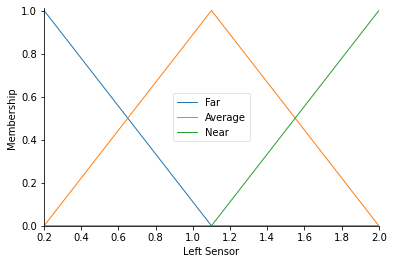

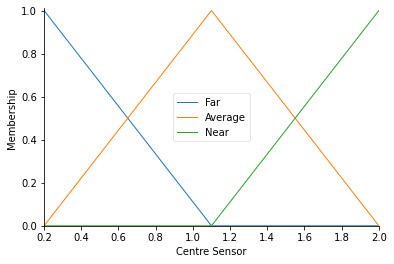

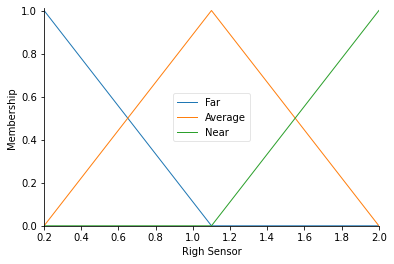

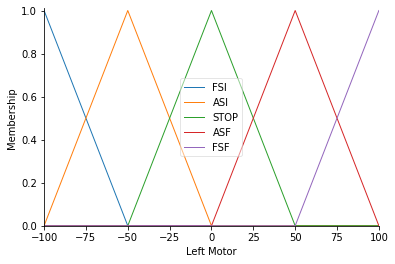

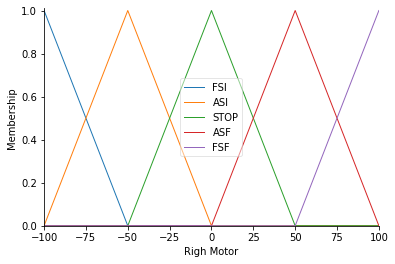

In [3]:
universe_Sensor = np.linspace(0.2,2, 61)
universe_Motor = np.linspace(-100,100,61)

#input
CB_Trai = ctrl.Antecedent(universe_Sensor, 'Left Sensor')
CB_Giua = ctrl.Antecedent(universe_Sensor, 'Centre Sensor')
CB_Phai = ctrl.Antecedent(universe_Sensor, 'Righ Sensor')
#output
Motor_Trai = ctrl.Consequent(universe_Motor, 'Left Motor') 
Motor_Phai = ctrl.Consequent(universe_Motor, 'Righ Motor') 

#name
#FSI : 
names_CB = ['Far', 'Average', 'Near']
names_Motor = ['FSI', 'ASI', 'STOP', 'ASF', 'FSF']
  #FSI : Full Speed Inverse
  #ASI : Average Speed Inverse
  #ASF : Average Speed Forward
  #FSF : Full Speed Forward

#.automf
CB_Trai.automf(names = names_CB)
CB_Giua.automf(names = names_CB)
CB_Phai.automf(names = names_CB)
Motor_Trai.automf(names = names_Motor)
Motor_Phai.automf(names = names_Motor)

#view
CB_Trai.view()
CB_Giua.view()
CB_Phai.view()
Motor_Trai.view()
Motor_Phai.view()

In [4]:
#rule motor trái (L)
rule_L = []

rule_L.append(ctrl.Rule(antecedent=(CB_Trai['Near'] & CB_Giua['Near'] & CB_Phai['Near']), consequent=Motor_Trai['FSI'], label='Rule FSI'))
rule_L.append(ctrl.Rule(antecedent=(CB_Trai['Far'] & CB_Giua['Far'] & CB_Phai['Near'])|(CB_Trai['Far'] & CB_Giua['Near'] & CB_Phai['Far'])|
                        (CB_Trai['Far'] & CB_Giua['Near'] & CB_Phai['Average'])|(CB_Trai['Far'] & CB_Giua['Average'] & CB_Phai['Near'])|
                        (CB_Trai['Far'] & CB_Giua['Near'] & CB_Phai['Near'])|(CB_Trai['Average'] & CB_Giua['Average'] & CB_Phai['Average'])|
                        (CB_Trai['Average'] & CB_Giua['Average'] & CB_Phai['Near'])|(CB_Trai['Average'] & CB_Giua['Near'] & CB_Phai['Near']), consequent=Motor_Trai['ASI'], label='Rule ASI'))
rule_L.append(ctrl.Rule(antecedent=(CB_Trai['Far'] & CB_Giua['Average'] & CB_Phai['Far'])|(CB_Trai['Far'] & CB_Giua['Far'] & CB_Phai['Average'])|
                        (CB_Trai['Far'] & CB_Giua['Average'] & CB_Phai['Average'])|(CB_Trai['Average'] & CB_Giua['Average'] & CB_Phai['Far'])|
                        (CB_Trai['Average'] & CB_Giua['Near'] & CB_Phai['Far'])|(CB_Trai['Average'] & CB_Giua['Near'] & CB_Phai['Average'])|
                        (CB_Trai['Near'] & CB_Giua['Average'] & CB_Phai['Far'])|(CB_Trai['Near'] & CB_Giua['Near'] & CB_Phai['Far'])|
                        (CB_Trai['Near'] & CB_Giua['Average'] & CB_Phai['Average'])|(CB_Trai['Near'] & CB_Giua['Average'] & CB_Phai['Near'])|
                        (CB_Trai['Near'] & CB_Giua['Near'] & CB_Phai['Average']), consequent=Motor_Trai['ASF'], label='Rule ASF'))
rule_L.append(ctrl.Rule(antecedent=(CB_Trai['Far'] & CB_Giua['Far'] & CB_Phai['Far'])|(CB_Trai['Average'] & CB_Giua['Far'] & CB_Phai['Far'])|
                        (CB_Trai['Average'] & CB_Giua['Far'] & CB_Phai['Average'])|(CB_Trai['Average'] & CB_Giua['Far'] & CB_Phai['Near'])|
                        (CB_Trai['Near'] & CB_Giua['Far'] & CB_Phai['Far'])|(CB_Trai['Near'] & CB_Giua['Far'] & CB_Phai['Average'])|
                        (CB_Trai['Near'] & CB_Giua['Far'] & CB_Phai['Near']), consequent=Motor_Trai['FSF'], label='Rule FSF'))
#rule Motor Phải (R)
rule_R = []

rule_R.append(ctrl.Rule(antecedent=(CB_Trai['Near'] & CB_Giua['Near'] & CB_Phai['Near']), consequent=Motor_Phai['FSI'], label='Rule FSI'))
rule_R.append(ctrl.Rule(antecedent=(CB_Trai['Average'] & CB_Giua['Average'] & CB_Phai['Far'])|(CB_Trai['Average'] & CB_Giua['Near'] & CB_Phai['Far'])|
                        (CB_Trai['Average'] & CB_Giua['Average'] & CB_Phai['Average'])|(CB_Trai['Average'] & CB_Giua['Near'] & CB_Phai['Average'])|
                        (CB_Trai['Near'] & CB_Giua['Average'] & CB_Phai['Far'])|(CB_Trai['Near'] & CB_Giua['Near'] & CB_Phai['Far'])|
                        (CB_Trai['Near'] & CB_Giua['Average'] & CB_Phai['Average'])|(CB_Trai['Near'] & CB_Giua['Near'] & CB_Phai['Average']), consequent=Motor_Phai['ASI'], label='Rule ASI'))
rule_R.append(ctrl.Rule(antecedent=(CB_Trai['Far'] & CB_Giua['Average'] & CB_Phai['Far'])|(CB_Trai['Far'] & CB_Giua['Far'] & CB_Phai['Near'])|
                        (CB_Trai['Far'] & CB_Giua['Near'] & CB_Phai['Far'])|(CB_Trai['Far'] & CB_Giua['Near'] & CB_Phai['Average'])|
                        (CB_Trai['Far'] & CB_Giua['Average'] & CB_Phai['Near'])|(CB_Trai['Far'] & CB_Giua['Near'] & CB_Phai['Near'])|
                        (CB_Trai['Average'] & CB_Giua['Far'] & CB_Phai['Far'])|(CB_Trai['Average'] & CB_Giua['Average'] & CB_Phai['Near'])|
                        (CB_Trai['Average'] & CB_Giua['Near'] & CB_Phai['Near'])|(CB_Trai['Near'] & CB_Giua['Far'] & CB_Phai['Far'])|
                        (CB_Trai['Near'] & CB_Giua['Average'] & CB_Phai['Near']), consequent=Motor_Phai['ASF'], label='Rule ASF'))
rule_R.append(ctrl.Rule(antecedent=(CB_Trai['Far'] & CB_Giua['Far'] & CB_Phai['Far'])|(CB_Trai['Far'] & CB_Giua['Far'] & CB_Phai['Average'])|
                        (CB_Trai['Far'] & CB_Giua['Average'] & CB_Phai['Average'])|(CB_Trai['Average'] & CB_Giua['Far'] & CB_Phai['Average'])|
                        (CB_Trai['Average'] & CB_Giua['Far'] & CB_Phai['Near'])|(CB_Trai['Near'] & CB_Giua['Far'] & CB_Phai['Average'])|
                        (CB_Trai['Near'] & CB_Giua['Far'] & CB_Phai['Near']), consequent=Motor_Phai['FSF'], label='Rule FSF'))

In [ ]:
#Control Motor_Trai
Motor_Trai_system = ctrl.ControlSystem(rule_L)
Motor_Trai_simulation = ctrl.ControlSystemSimulation(Motor_Trai_system, flush_after_run = 61*61+1)

upsampled1 = np.linspace(0.2, 2, 61)
upsampled2 = np.linspace(0.2, 2, 61)
upsampled3 = np.linspace(-100, 100, 61)

x,y,t = np.meshgrid(upsampled1, upsampled2, upsampled3)
z   = np.zeros_like(x)
for i in range(61) :
  for j in range(61) :
    Motor_Trai_simulation.input['Left Sensor'] = x[i,j]
    Motor_Trai_simulation.input['Centre Sensor'] = y[i,j]
    Motor_Trai_simulation.input['Righ Sensor'] = t[i,j]
    Motor_Trai_simulation.compute()
    z[i,j] = Motor_Trai_simulation.output['Left Motor']

#Xuất đồ thị Motor_Trai
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,t,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.5, antialiased = True)
ax.view_init(30,200)

In [ ]:
#Control Motor_Phai
Motor_Phai_system = ctrl.ControlSystem(rule_R)
Motor_Phai_simulation = ctrl.ControlSystemSimulation(Motor_Phai_system, flush_after_run = 61*61+1)

upsampled1 = np.linspace(-np.pi/2, np.pi/2, 61)
upsampled2 = np.linspace(-np.pi/4, np.pi/4, 61)

x,y = np.meshgrid(upsampled1, upsampled2)
z   = np.zeros_like(x)
for i in range(61) :
  for j in range(61) :
    Motor_Phai_simulation.input['Anpha'] = x[i,j]
    Motor_Phai_simulation.input['Derivative Anpha'] = y[i,j]
    Motor_Phai_simulation.compute()
    z[i,j] = Motor_Phai_simulation.output['Righ Motor']

#Xuất đồ thị Motor_Phai
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.5, antialiased = True)
ax.view_init(30,200)